/Users/roshanklein-seetharaman/miniforge3/envs/suli_tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


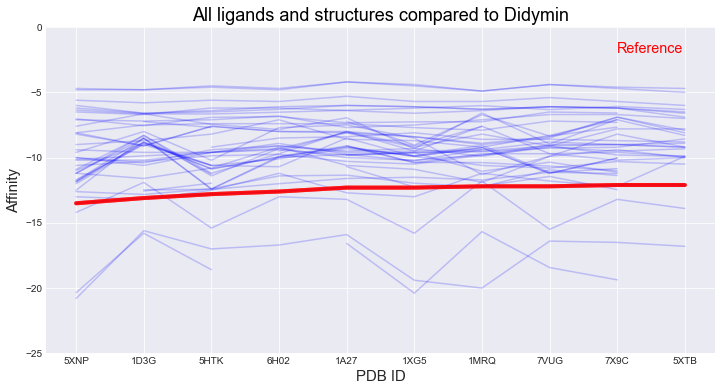

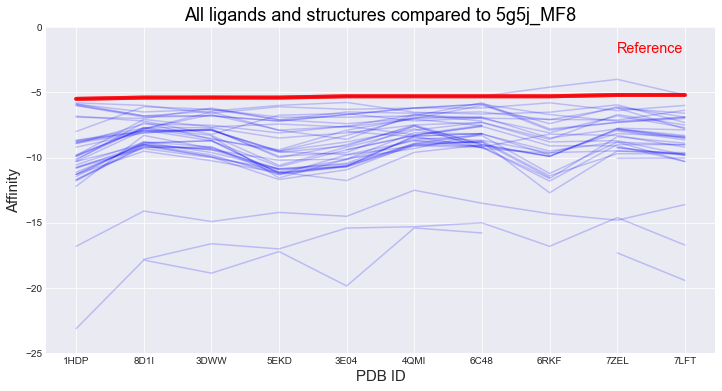

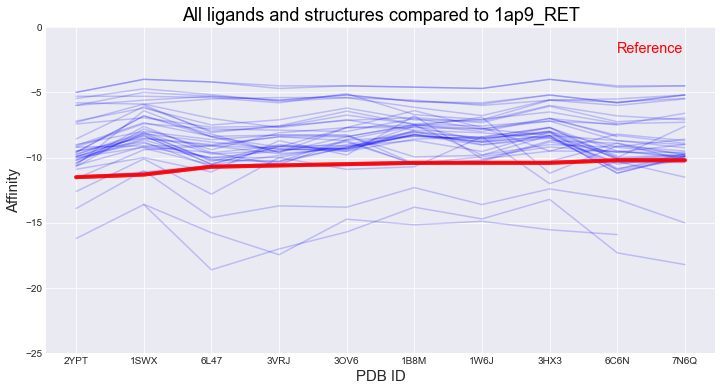

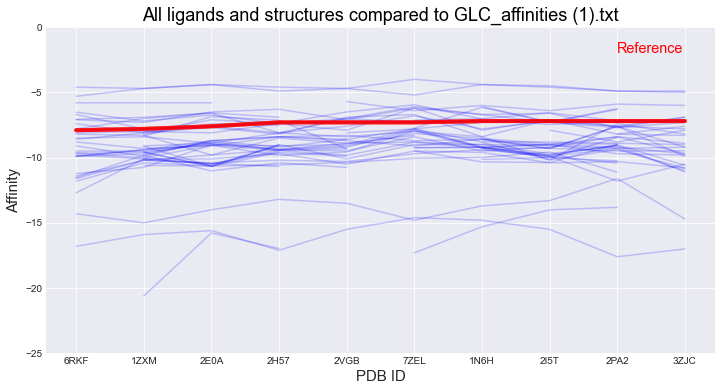

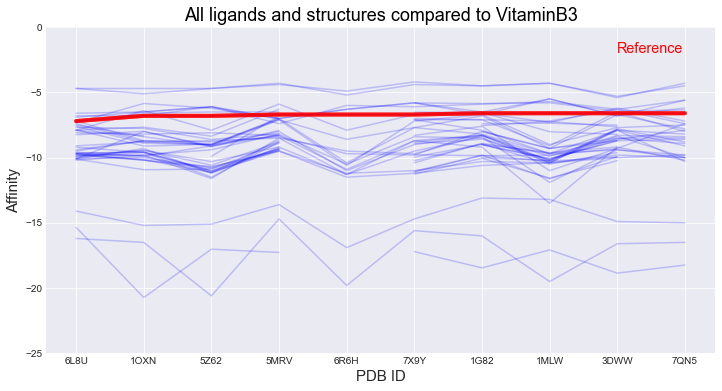

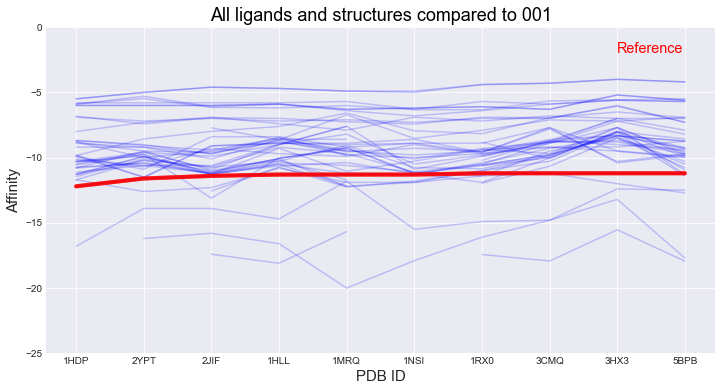

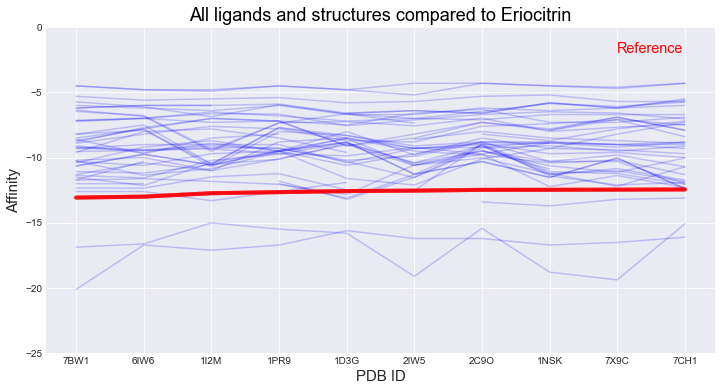

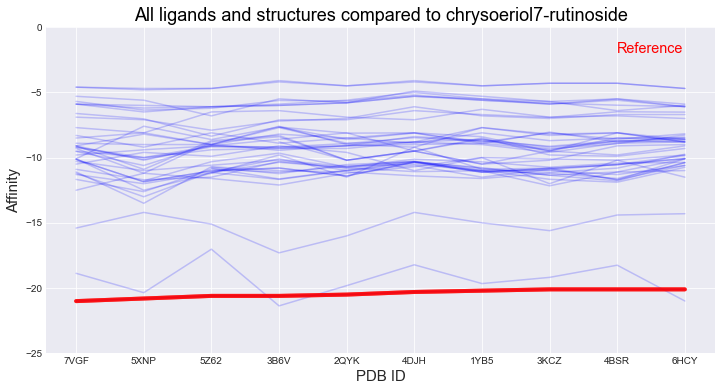

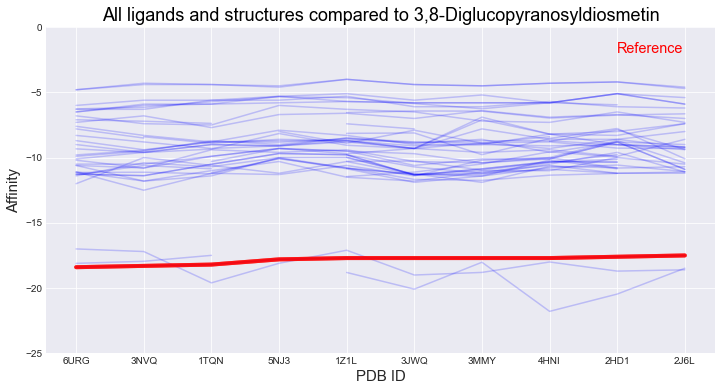

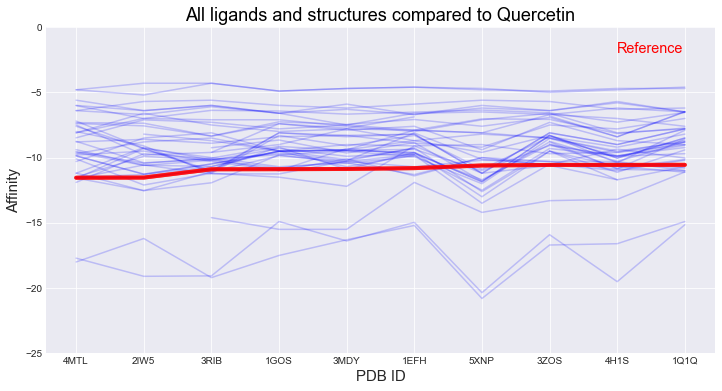

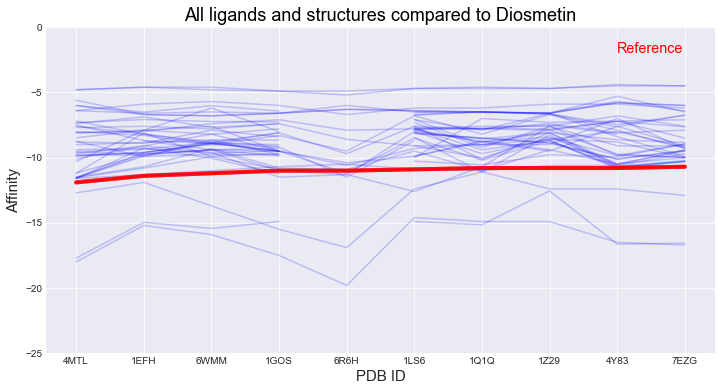

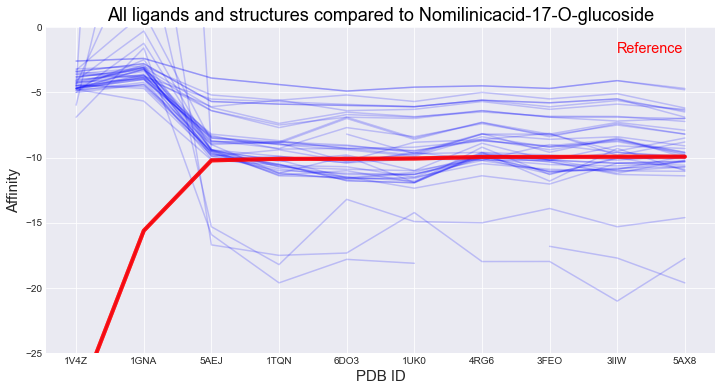

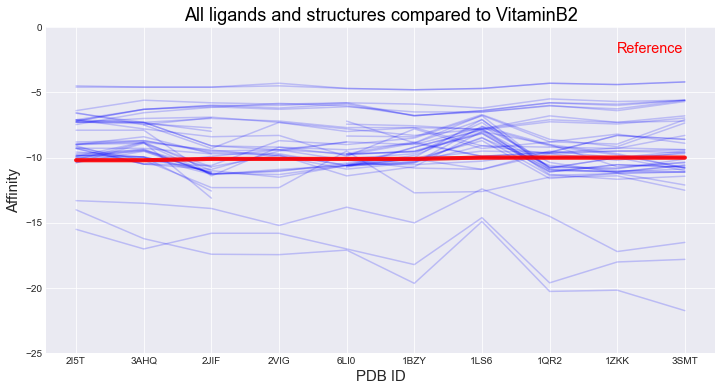

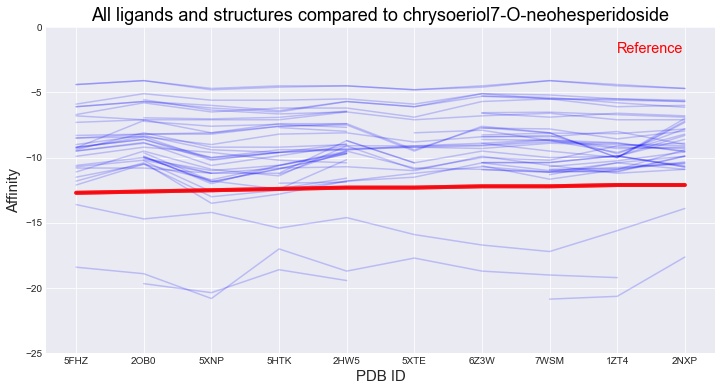

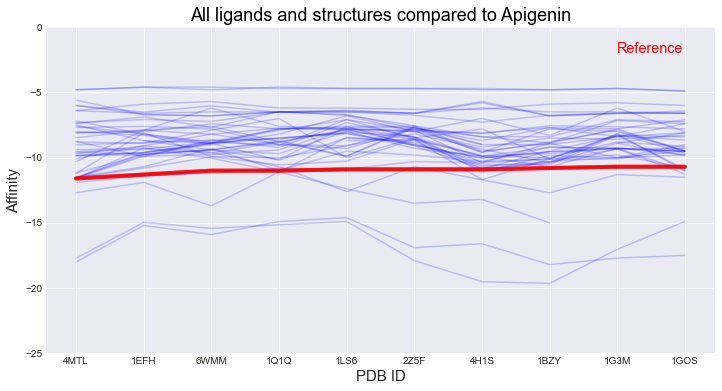

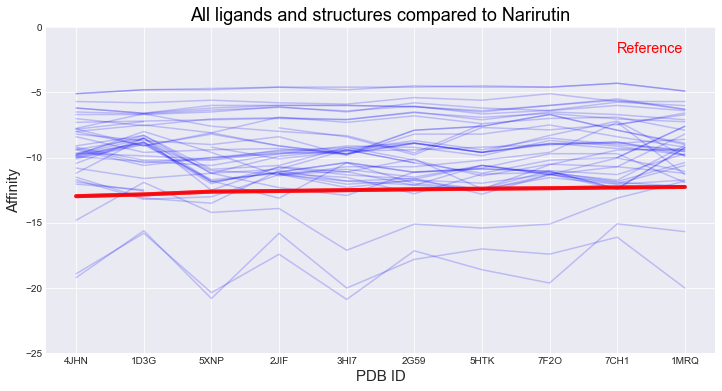

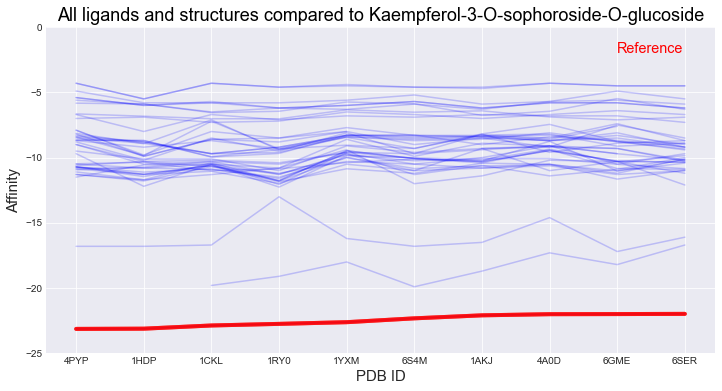

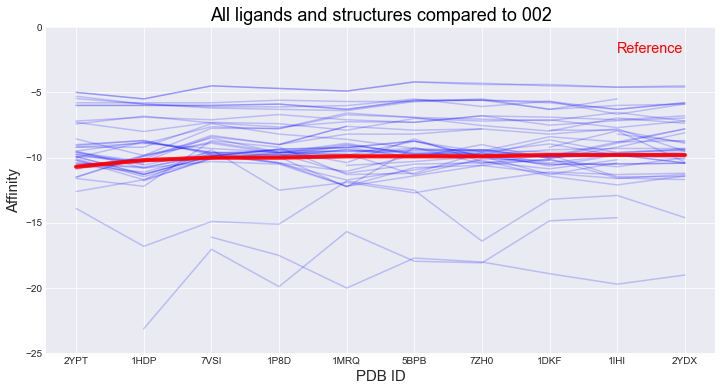

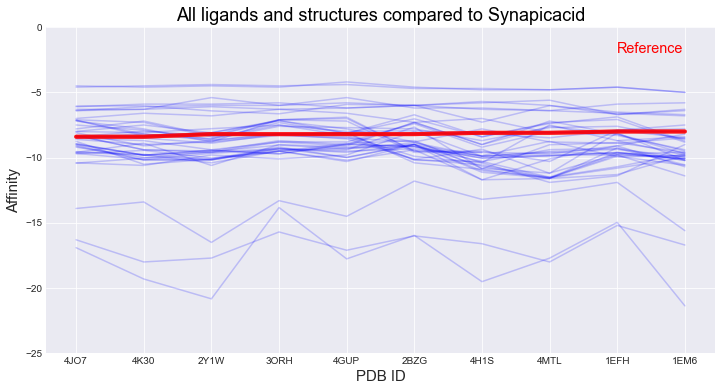

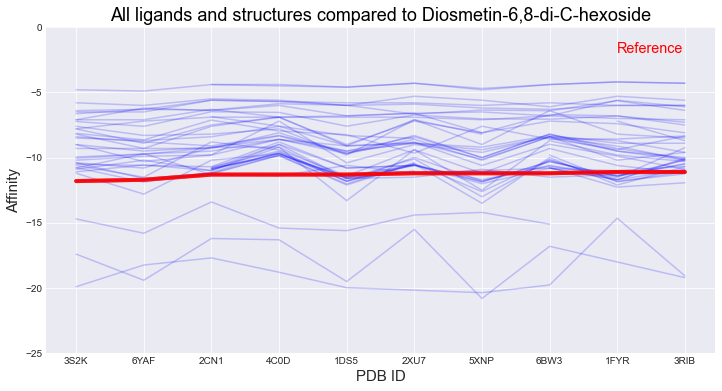

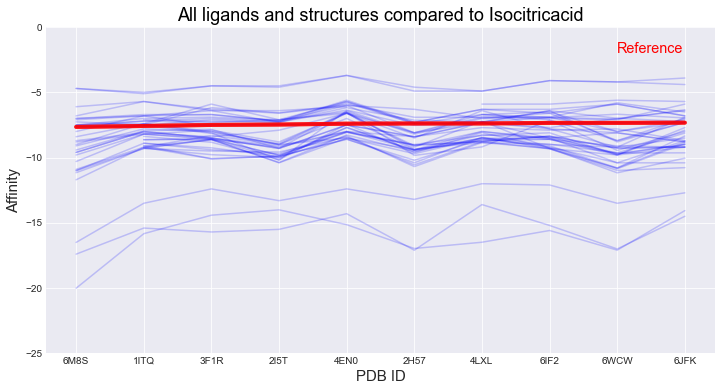

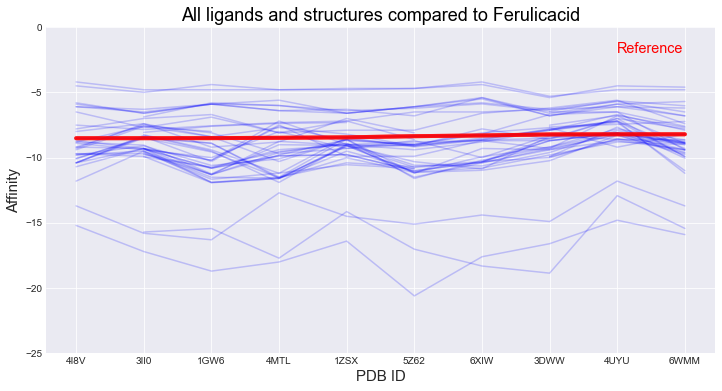

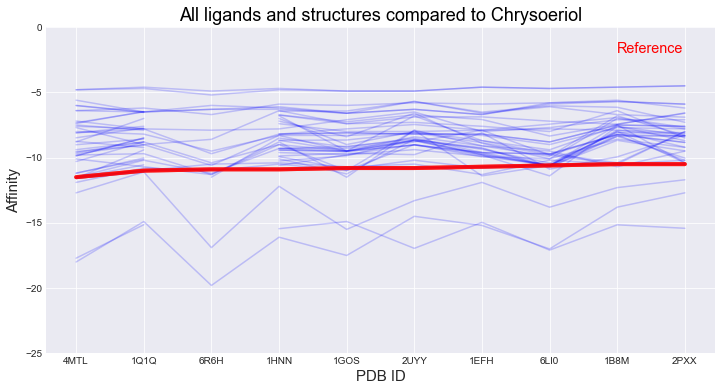

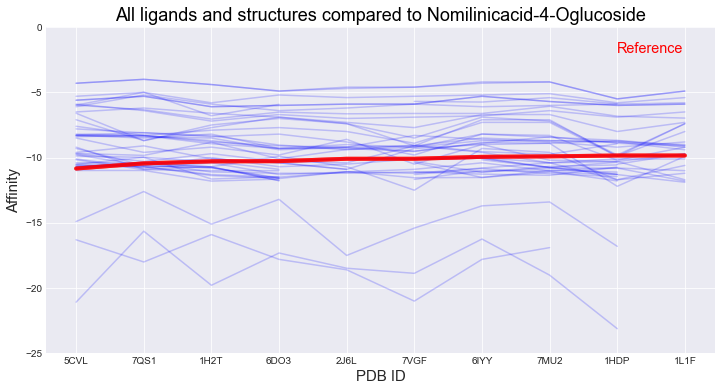

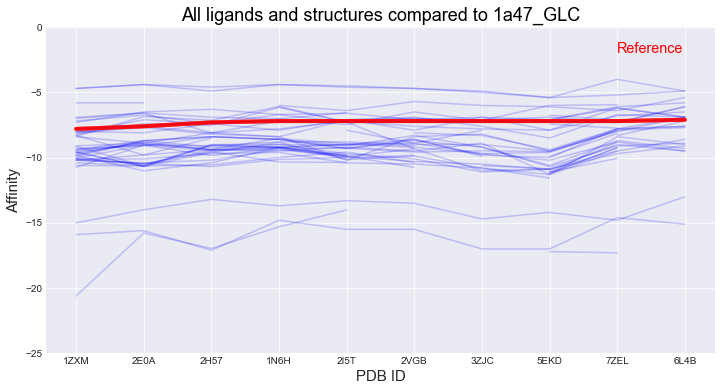

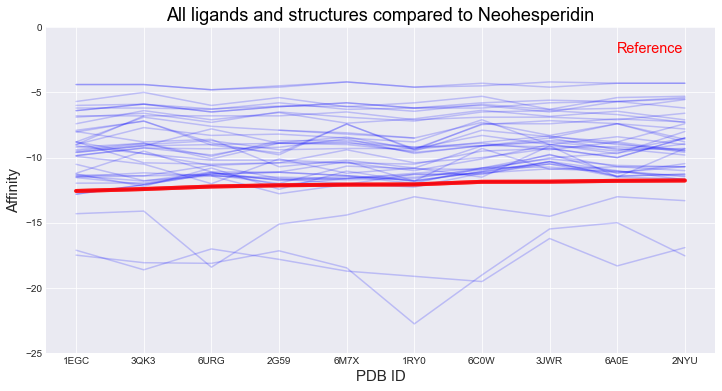

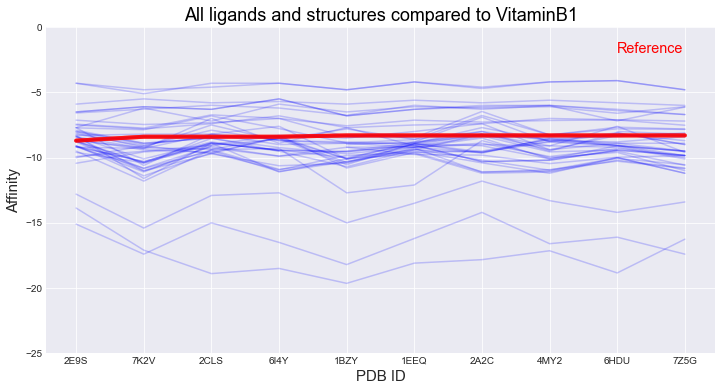

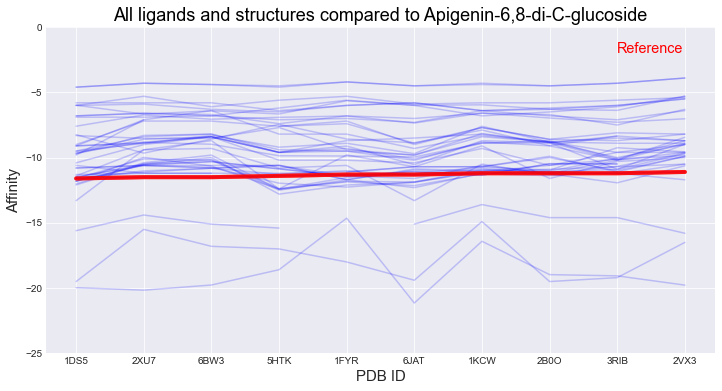

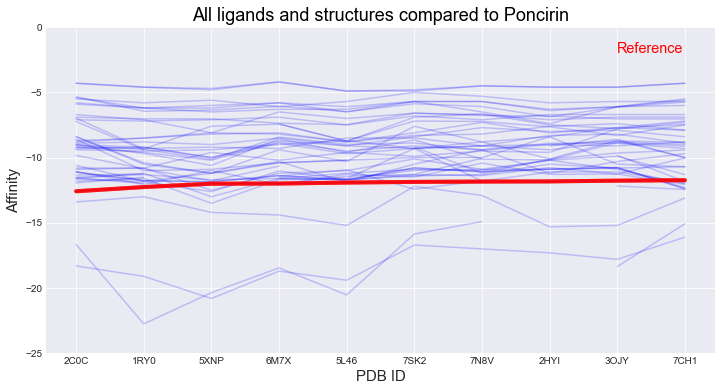

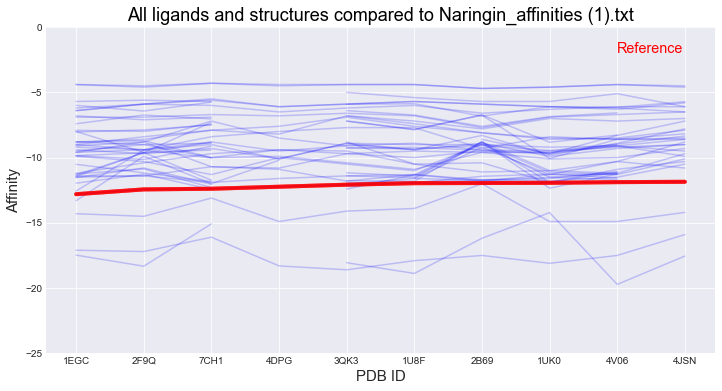

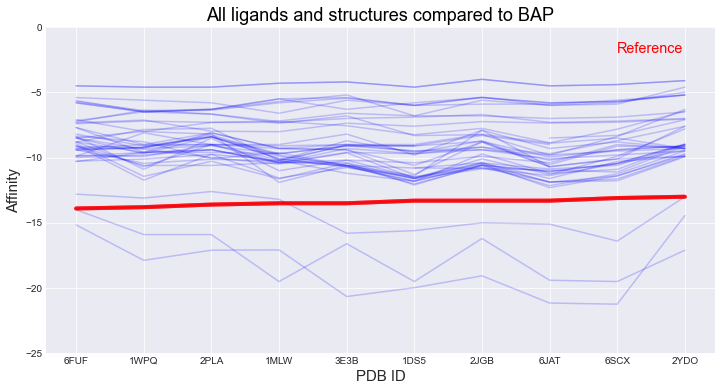

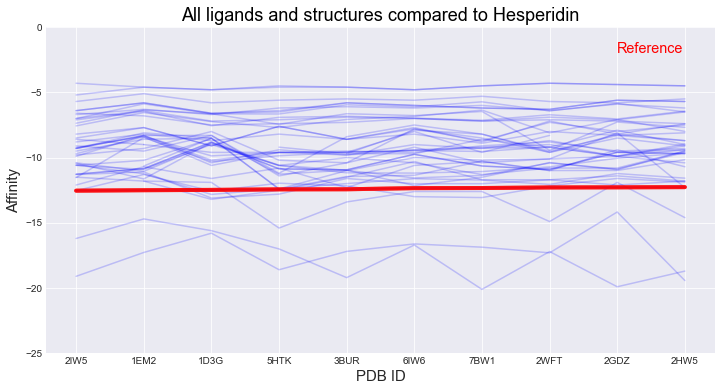

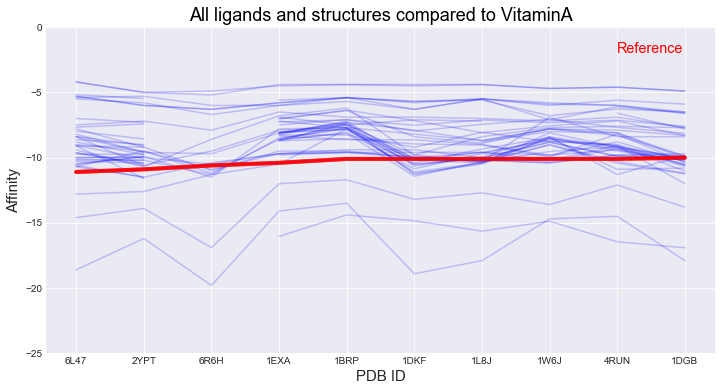

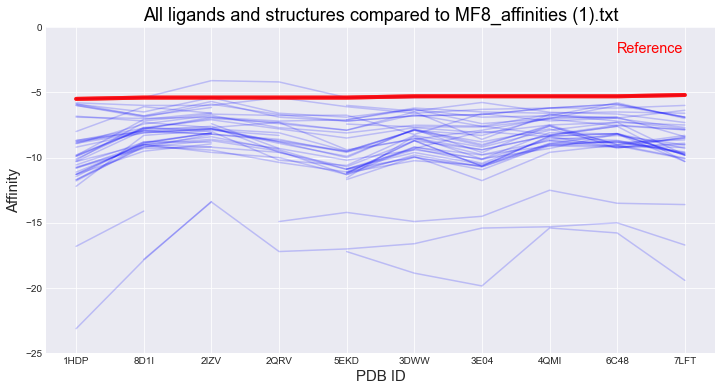

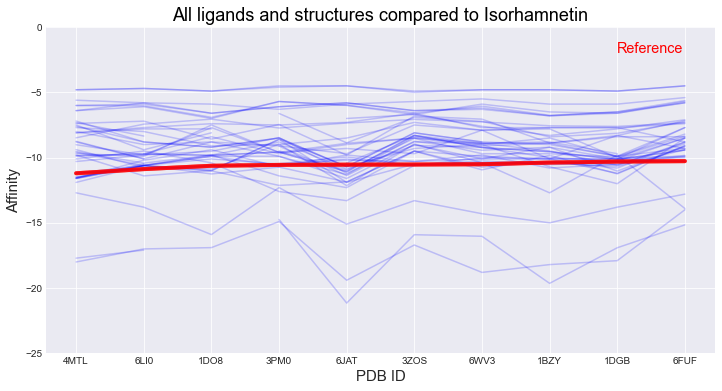

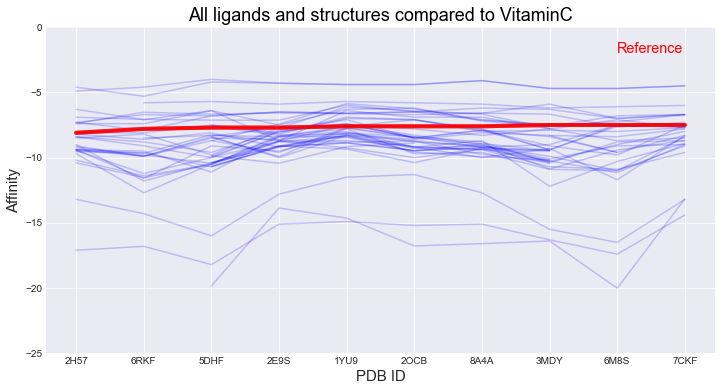

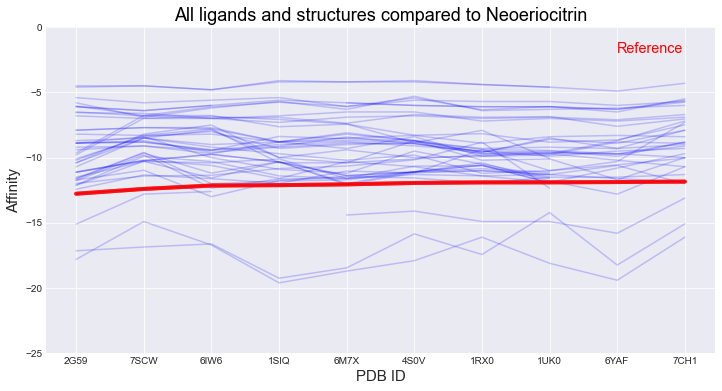

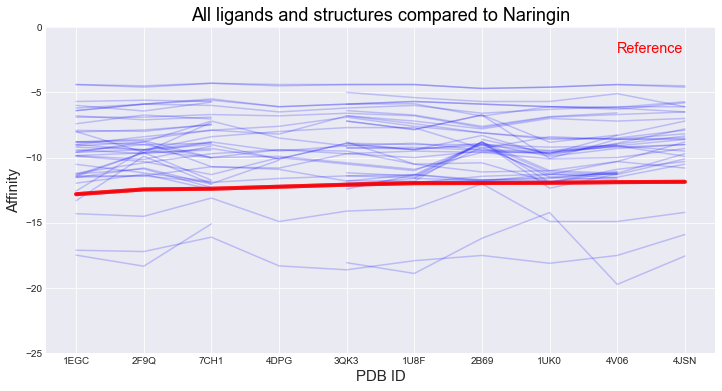

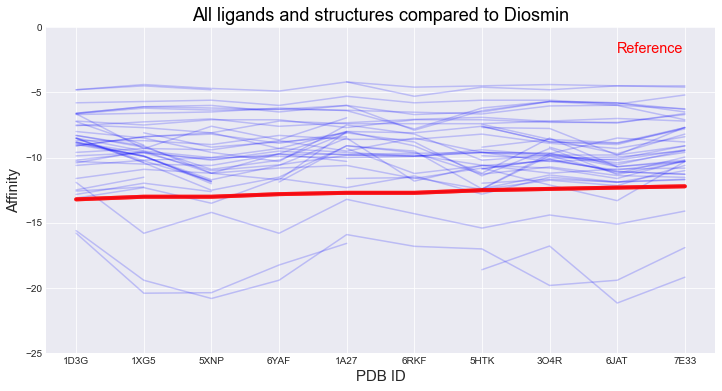

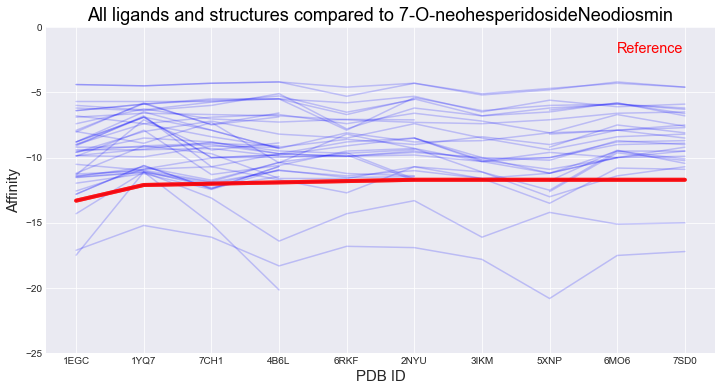

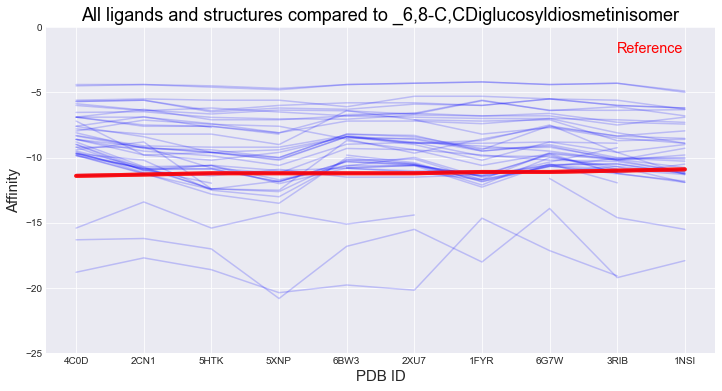

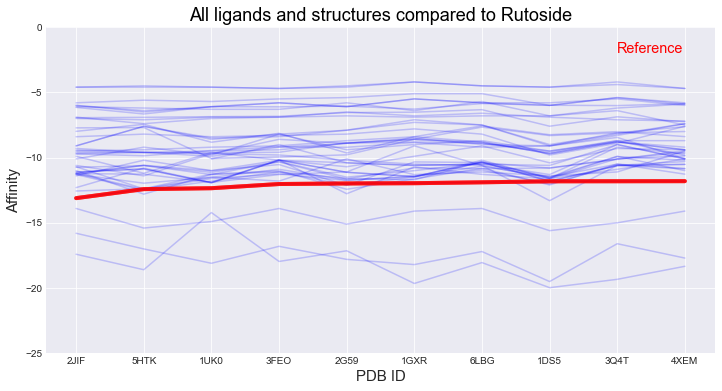

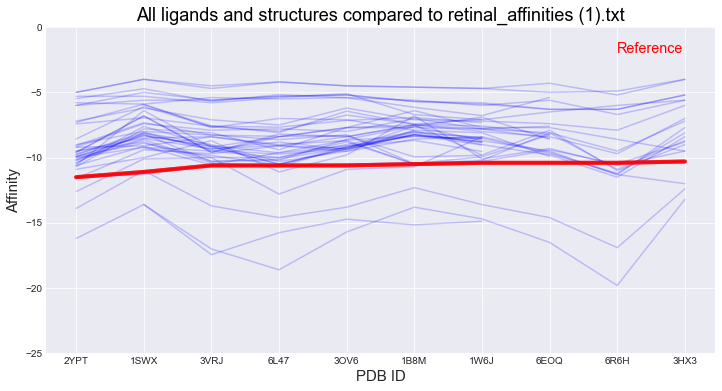

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

directory = 'ligands'

for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and f != "ligands/.DS_Store":
            reference_df = pd.read_csv(f, delim_whitespace=True, header=None)
            reference_df.drop(columns=[1, 3, 4], inplace=True)

            reference_df[0] = reference_df[0].str.split('/').str[1]
            reference_df[0] = reference_df[0].str.removesuffix(".pdb")

            reference_df.sort_values(by=[2], inplace=True)

            reference_df.rename(columns={0: f, 2: f+"Value"}, inplace=True)

            reference_df.set_index(f, inplace=True)
            
            all_ligands = reference_df

            for filename in os.listdir(directory):
                    g = os.path.join(directory, filename)
                    if os.path.isfile(f) and g != "ligands/.DS_Store":
                        df = pd.read_csv(g, delim_whitespace=True, header=None, encoding = "ISO-8859-1")
                        df.drop(columns=[1, 3, 4], inplace=True)
                        df[0] = df[0].str.split('/').str[1]
                        df[0] = df[0].str.removesuffix(".pdb")

                        df.rename(columns={0: g, 2: g+"Value"}, inplace=True)
                        df.set_index(g, drop=False, inplace=True)
                        all_ligands = pd.concat([all_ligands, df], axis=1)
                        del df

            plt.style.use('seaborn-darkgrid')
            
            #all_ligands = all_ligands.iloc[:10]

            ax = all_ligands.plot(y=all_ligands.columns, 
                             use_index=True, 
                             figsize=(12, 6), 
                             ylim=[-25,0], 
                             alpha=0.2, 
                             legend=False, 
                             color='blue')

            plt.plot(all_ligands.index, 
                     all_ligands[f+'Value'], 
                     marker='', 
                     color='red', 
                     linewidth=4, 
                     alpha=0.7)

            plt.text(all_ligands.index[-2],
                     -2,
                     'Reference',
                     fontsize='x-large', 
                     color='red')


            plt.title("All ligands and structures compared to "+remove_prefix(remove_suffix(f, '_affinities.txt'), 'ligands/'), loc='center', fontsize=18, fontweight=0, color='Black')
            plt.xlabel("PDB ID", fontsize=15)
            plt.ylabel("Affinity", fontsize=15)
            
            
            ax.set_xticks(range(len(all_ligands)));
            ax.set_xticklabels([item for item in all_ligands.index.tolist()])
            
            plt.savefig('top_10_figures/'+remove_prefix(remove_suffix(f, '_affinities.txt'), 'ligands/')+'FIGURE.png')

In [17]:
def remove_suffix(input_string, suffix):
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    return input_string

def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text 

In [18]:
for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and f != "ligands/.DS_Store":
            print(f)
            print(remove_prefix(remove_suffix(f, '_affinities.txt'), 'ligands/'))

ligands/Didymin_affinities.txt
Didymin
ligands/5g5j_MF8_affinities.txt
5g5j_MF8
ligands/1ap9_RET_affinities.txt
1ap9_RET
ligands/GLC_affinities (1).txt
GLC_affinities (1).txt
ligands/VitaminB3_affinities.txt
VitaminB3
ligands/001_affinities.txt
001
ligands/Eriocitrin_affinities.txt
Eriocitrin
ligands/chrysoeriol7-rutinoside_affinities.txt
chrysoeriol7-rutinoside
ligands/3,8-Diglucopyranosyldiosmetin_affinities.txt
3,8-Diglucopyranosyldiosmetin
ligands/Quercetin_affinities.txt
Quercetin
ligands/Diosmetin_affinities.txt
Diosmetin
ligands/Nomilinicacid-17-O-glucoside_affinities.txt
Nomilinicacid-17-O-glucoside
ligands/VitaminB2_affinities.txt
VitaminB2
ligands/chrysoeriol7-O-neohesperidoside_affinities.txt
chrysoeriol7-O-neohesperidoside
ligands/Apigenin_affinities.txt
Apigenin
ligands/Narirutin_affinities.txt
Narirutin
ligands/Kaempferol-3-O-sophoroside-O-glucoside_affinities.txt
Kaempferol-3-O-sophoroside-O-glucoside
ligands/002_affinities.txt
002
ligands/Synapicacid_affinities.txt
Syna